Data **Collection**

In [ ]:
pip install pandas nltk


In [1]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# List the uploaded files
for filename in uploaded.keys():
    print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')


Saving HateSpeechDataset.csv to HateSpeechDataset.csv
User uploaded file "HateSpeechDataset.csv" with length 201991397 bytes


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('HateSpeechDataset.csv')

# Display the first few rows of the dataframe
df.head()


,Content,Label,Content_int
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,..."
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22..."
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,..."
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,..."
4,afro american basho,1,"[146715, 46, 47, 48, 146714]"


In [19]:
df.describe()

,Content,Label,Content_int,cleanText
count,440906,440906,440906,440906
unique,417561,3,417561,407725
top,content,0,"[146715, 7139, 146714]",
freq,7,361594,7,341


In [5]:
df.tail()

,Content,Label,Content_int
440901,crash another movie from left field i have to ...,0,"[146715, 1780, 649, 1673, 347, 701, 1702, 80, ..."
440902,i why do not you debate first before starting ...,0,"[146715, 80, 186, 340, 76, 26, 6407, 566, 2608..."
440903,removal of i reverted the removal of the above...,0,"[146715, 18731, 1, 80, 48182, 3, 18731, 1, 3, ..."
440904,i have unblocked you eddie as i discussed on u...,0,"[146715, 80, 87, 20515, 26, 10684, 273, 80, 95..."
440905,you have the ability to delete that revision a...,0,"[146715, 26, 87, 3, 12795, 7, 3358, 28, 3938, ..."


In [6]:
!pip install nltk beautifulsoup4


Data Cleaning

In [8]:
import re
import string
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK data files (only the first time)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean text
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords and lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Join words back into a single string
    clean_text = ' '.join(words)

    return clean_text

# Assuming your text data is in a column named 'text'
# Apply the cleaning function to the 'text' column and create a new 'cleanText' column
df['cleanText'] = df['Content'].apply(clean_text) # Change 'Content' to the actual column name containing text data

# Display the first few rows of the cleaned dataframe
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Content,Label,Content_int,cleanText
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...",denial normal con asked comment tragedy emotio...
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22...",able tweet insufferable bullshit prof trump na...
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,...",retarded cute single life
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,...",thought real badass mongol style declaration w...
4,afro american basho,1,"[146715, 46, 47, 48, 146714]",afro american basho


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Content').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Content_int').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('cleanText').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Content_int'].value_counts()
    for x_label, grp in _df_3.groupby('Content')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Content')
_ = plt.ylabel('Content_int')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['cleanText'].value_counts()
    for x_label, grp in _df_4.groupby('Content_int')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Content_int')
_ = plt.ylabel('cleanText')

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['cleanText'])

# Display the shape of the resulting feature matrix
print("TF-IDF feature matrix shape:", X_tfidf.shape)


TF-IDF feature matrix shape: (440906, 5000)


**Data preprocessing**

In [11]:
# Feature Extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['cleanText'])

# Display the shape of the resulting feature matrix
print("TF-IDF feature matrix shape:", X_tfidf.shape)

# Model Training
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Extract the labels
y = df['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


TF-IDF feature matrix shape: (440906, 5000)
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     72261
           1       0.65      0.41      0.50     15921

    accuracy                           0.85     88182
   macro avg       0.76      0.68      0.71     88182
weighted avg       0.84      0.85      0.84     88182

Confusion Matrix:
 [[68728  3533]
 [ 9441  6480]]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


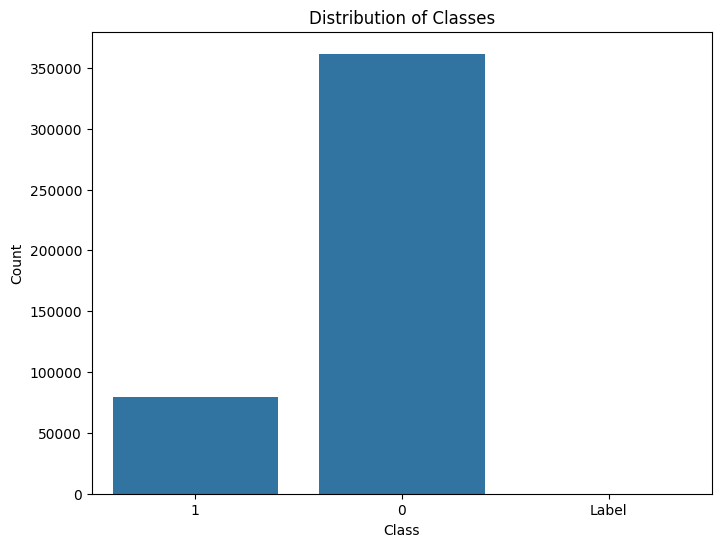

In [23]:
# Install required libraries
!pip install matplotlib seaborn wordcloud

# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pandas as pd
from collections import Counter
import nltk

nltk.download('punkt')

# Load the dataset
df = pd.read_csv('HateSpeechDataset.csv')

# Distribution of Classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis('off')
    plt.show()


